import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import data using pd.read_csv()

In [2]:
start_year='1960'
end_year='2018'
GDP=pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_713242.csv', header=2)
CO2=pd.read_csv('API_EN.ATM.CO2E.PC_DS2_en_csv_v2_713061.csv', header=2)
pop=pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv', header=2)
GDP_per_capita=pd.read_csv('GDP_per_capita/GDP_per_capita.csv', header=2)

FileNotFoundError: [Errno 2] File b'GDP_current/GDP_current.csv' does not exist: b'GDP_current/GDP_current.csv'

check if 'Country Code' is unique, then set_index to 'Country Code'

In [252]:
(GDP_per_capita['Country Code'].value_counts()>1).sum()+(CO2['Country Code'].value_counts()>1).sum()+(pop['Country Code'].value_counts()>1).sum()+(GDP['Country Code'].value_counts()>1).sum()
GDP_per_capita=GDP_per_capita.set_index('Country Code')
GDP=GDP.set_index('Country Code')
CO2=CO2.set_index('Country Code')
pop=pop.set_index('Country Code')

put GDP in the units of Billions and population in the units of Millions

In [253]:
GDP.loc[:, start_year:end_year]=GDP.loc[:, start_year:end_year]/1000000000
pop.loc[:, start_year:end_year]=pop.loc[:, start_year:end_year]/1000000

create new DF with only relevant columns

In [254]:
GDP=pd.concat([GDP.loc[:, :'Indicator Name'], GDP.loc[:, start_year:end_year]], axis=1)
CO2=pd.concat([CO2.loc[:, :'Indicator Name'], CO2.loc[:, start_year:end_year]], axis=1)
pop=pd.concat([pop.loc[:, :'Indicator Name'], pop.loc[:, start_year:end_year]], axis=1)
GDP_per_capita=pd.concat([GDP_per_capita.loc[:, :'Indicator Name'], GDP_per_capita.loc[:, start_year:end_year]], axis=1)

In [255]:
# single_country=input('Enter the country code: ')

# combined_gdp[combined_gdp['Country Code']==single_country].loc[:, start_year:end_year].T.plot(title="{} GDP".format(single_country))
# combined_co2[combined_co2['Country Code']==single_country].loc[:, start_year:end_year].T.plot(title="{} CO2".format(single_country))
# combined_pop[combined_pop['Country Code']==single_country].loc[:, start_year:end_year].T.plot(title="{} Pop".format(single_country))
# plt.show()

check if GDP_per_capita is the same thing as GDP divided by population; the code uses only the '2018' column from each of the data set; the resulting few Falses is due to NA

In [256]:
combined_GDP_pop=pd.concat([index_GDP['2018'], index_pop['2018'], index_GDP_per_capita['2018']], axis=1)
combined_GDP_pop.columns=['GDP', 'pop', 'GDP_per_capita']
combined_GDP_pop['calculated']=(round(combined_GDP_pop['GDP']/combined_GDP_pop['pop'], 2)==round(combined_GDP_pop['GDP_per_capita'], 2))
combined_GDP_pop['calculated'].value_counts()
# combined_GDP_pop['calculated']==combined_GDP_pop['GDP_per_capita'].value_counts()

True     234
False     30
Name: calculated, dtype: int64

generate line graphs on the same plot

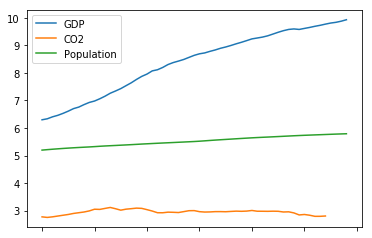

In [257]:
single_country='USA'
one_country_gdp=combined_gdp[combined_gdp['Country Code']==single_country].loc[:, start_year:end_year].T
one_country_co2=combined_co2[combined_co2['Country Code']==single_country].loc[:, start_year:end_year].T
one_country_pop=combined_pop[combined_pop['Country Code']==single_country].loc[:, start_year:end_year].T
combined=pd.concat([one_country_gdp, one_country_co2, one_country_pop], axis=1)
combined.columns=['GDP', 'CO2', 'Population']
np.log(combined).plot()
plt.show()

binning GDP_per_caipta for 2018 and creating a country_labels DF for the labels

In [265]:
GDP_per_capita['category']=pd.cut(GDP_per_capita['2018'], 6)
country_labels=GDP_per_capita[['Country Name', 'category']]

creating line graphs for each the mean CO2/capita per category per year

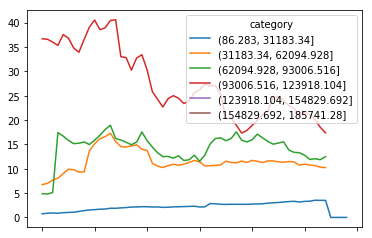

In [272]:
labeled_CO2=CO2.join(country_labels['category'])
labeled_CO2.groupby('category').mean().T.plot()